In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# /Users/vanessawilson/sbox/Curriculum/DA_DA430

df = pd.read_csv("/Users/vanessawilson/sbox/Curriculum/DA_DA430/Week5/kaggle_Interests_group.csv")

In [2]:
df.fillna(0, inplace = True)

In [3]:
x = df.iloc[:,2:]
print(list(df))

['group', 'grand_tot_interests', 'interest1', 'interest2', 'interest3', 'interest4', 'interest5', 'interest6', 'interest7', 'interest8', 'interest9', 'interest10', 'interest11', 'interest12', 'interest13', 'interest14', 'interest15', 'interest16', 'interest17', 'interest18', 'interest19', 'interest20', 'interest21', 'interest22', 'interest23', 'interest24', 'interest25', 'interest26', 'interest27', 'interest28', 'interest29', 'interest30', 'interest31', 'interest32', 'interest33', 'interest34', 'interest35', 'interest36', 'interest37', 'interest38', 'interest39', 'interest40', 'interest41', 'interest42', 'interest43', 'interest44', 'interest45', 'interest46', 'interest47', 'interest48', 'interest49', 'interest50', 'interest51', 'interest52', 'interest53', 'interest54', 'interest55', 'interest56', 'interest57', 'interest58', 'interest59', 'interest60', 'interest61', 'interest62', 'interest63', 'interest64', 'interest65', 'interest66', 'interest67', 'interest68', 'interest69', 'interest7

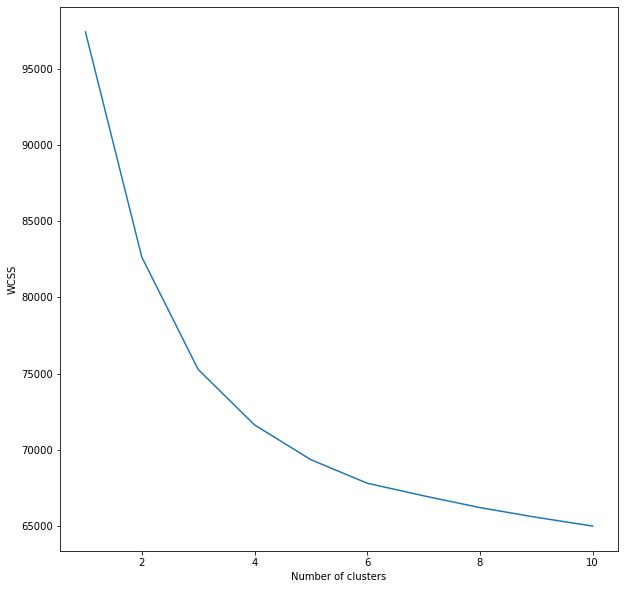

In [4]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
pca = PCA(2)
data = pca.fit_transform(x)

In [6]:
data.shape

(6340, 2)

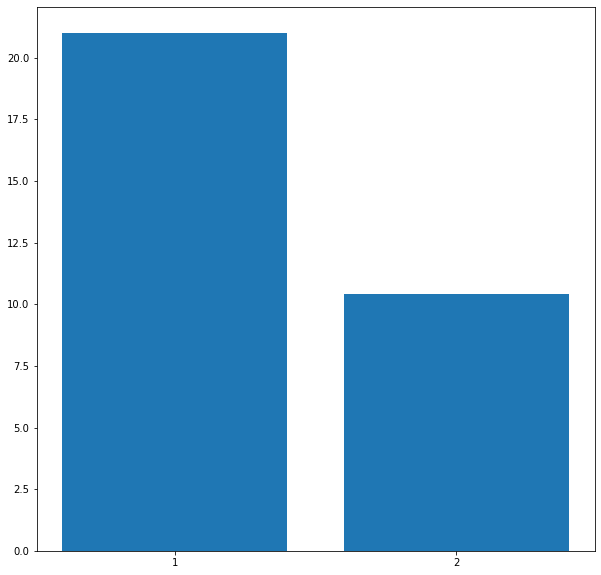

In [7]:
# TODO research figsize
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

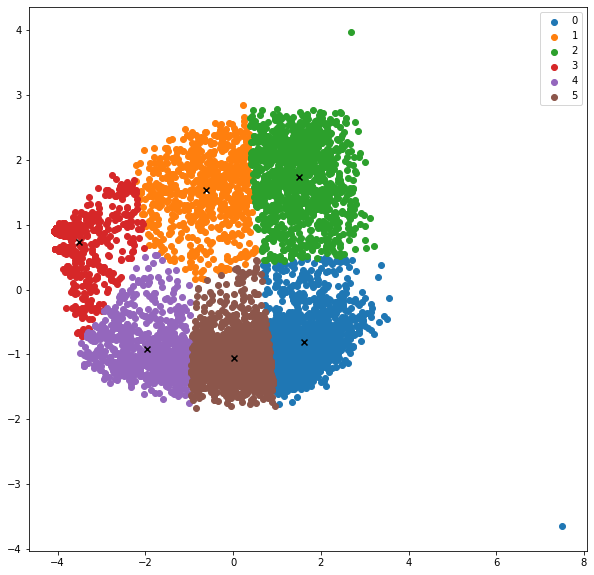

In [8]:
model = KMeans(n_clusters = 6, init = "k-means++")
centers = np.array(model.fit(data).cluster_centers_)
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()